# Marketing Mix Modeling: Capstone 3 Project<br>

# Modeling & Hyperparameter Tuning

## Table of Contents
* [A: Load Files](#a)
* [B: Scaling IVs](#b)
* [C: Ridge Regression Models](#c)
* [D: Lasso Regression Models](#d)
* [E: Random Forest Models](#e)
* [F: Model Summary](#f)

## A: Load Files <a class="anchor" id="a"></a>

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.model_selection import cross_validate, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


import qgrid
def view(df_test):
    return qgrid.show_grid(df_test, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

In [3]:
#Open dfs

#train & test data

#Option 1:
X_train_1 = pd.read_pickle('../b_Data/X_train_1.pkl')
y_train_1 = pd.read_pickle('../b_Data/y_train_1.pkl')
X_test_1 = pd.read_pickle('../b_Data/X_test_1.pkl')
y_test_1 = pd.read_pickle('../b_Data/y_test_1.pkl')

#Option 2:
X_train_2 = pd.read_pickle('../b_Data/X_train_2.pkl')
y_train_2 = pd.read_pickle('../b_Data/y_train_2.pkl')
X_test_2 = pd.read_pickle('../b_Data/X_test_2.pkl')
y_test_2 = pd.read_pickle('../b_Data/y_test_2.pkl')

#linear regression models
open_file = open('../b_Data/lr_model_1.pkl', "rb")
lr_model_1 = pickle.load(open_file)
open_file.close()

open_file = open('../b_Data/lr_model_2.pkl', "rb")
lr_model_2 = pickle.load(open_file)
open_file.close()

In [4]:
#Check import
print(X_train_1.shape)
print(y_train_1.shape)
print(X_test_1.shape)
print(y_test_1.shape)

print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)

(250, 12)
(250,)
(108, 12)
(108,)
(250, 12)
(250,)
(108, 12)
(108,)


## B: Scale the IVs <a class="anchor" id="b"></a>

#### Option 1

In [5]:
#Start with scaling the data again

#Instantiate the StandardScaler
scaler = StandardScaler()

#Fit the scaler with the training set
scaler.fit(X_train_1)

#Transform the training and test sets using the fit scaler
X_train_1_scaled = scaler.transform(X_train_1)
X_test_1_scaled = scaler.transform(X_test_1)

#Check work
print(X_train_1_scaled.mean())
print(X_test_1_scaled.mean())

-4.1448326252672514e-18
0.11078953341327243


#### Option 2

In [6]:
#Instantiate the StandardScaler
scaler = StandardScaler()

#Fit the scaler with the training set
scaler.fit(X_train_2)

#Transform the training and test sets using the fit scaler
X_train_2_scaled = scaler.transform(X_train_2)
X_test_2_scaled = scaler.transform(X_test_2)

#Check work
print(X_train_2_scaled.mean())
print(X_test_2_scaled.mean())

6.217248937900877e-18
0.0566760587556149


## C: Ridge Regression Models <a class="anchor" id="c"></a>

#### Option 1

In [7]:
#Instantiate the Ridge regression with cross-validation to test different values of alpha

#RidgeCV with 5-fold cross-validation (50 rows per fold)
ridge_cv = RidgeCV(cv=5)

# Fit the linear regression
ridge_cv_model = ridge_cv.fit(X_train_1_scaled, y_train_1)

# View alpha
best_alpha = ridge_cv_model.alpha_
print(best_alpha)

0.1


In [8]:
#Instantiate model with alpha = best_alpha
model_3 = Ridge(alpha=best_alpha).fit(X_train_1_scaled, y_train_1)

#Generate predictions
y_train_pred_3 = model_3.predict(X_train_1_scaled)
y_test_pred_3 = model_3.predict(X_test_1_scaled)

In [9]:
#Model parameters
print('Weight coefficients: ',model_3.coef_)

Weight coefficients:  [ -791.336098    3151.1971674   -268.24762477  -926.76198798
  2921.63099547  1636.13932349 -1776.94105276 -2201.83186011
  3285.83744462 -2069.65154295  1027.87800445  -585.88437246]


#### Evaluate Ridge Regression Model 3

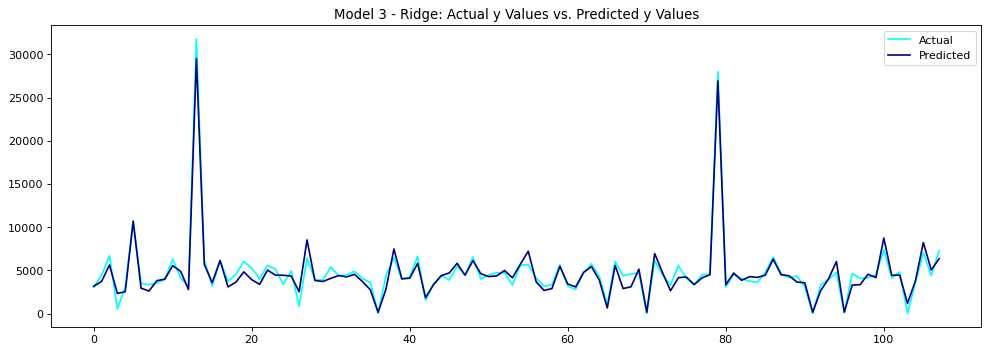

In [10]:
#Plot accuracy

# Creating Line Graph
plt.figure(num=None, figsize=(15, 5), dpi=80)
y1 = y_test_1.to_numpy()
y2 = y_test_pred_3
plt.plot(y1, label = 'Actual', color = 'aqua') 
plt.plot(y2, label = 'Predicted', color = 'navy')
plt.title('Model 3 - Ridge: Actual y Values vs. Predicted y Values')
plt.legend()
plt.show()

In [11]:
# Get r-squared value for training and test sets
model_3_r2 = r2_score(y_train_1, y_train_pred_3), r2_score(y_test_1, y_test_pred_3)
model_3_r2

(0.8758219835787782, 0.9611336229147058)

In [12]:
# Get mean absolute error for training and test sets
model_3_mae = mean_absolute_error(y_train_1, y_train_pred_3), mean_absolute_error(y_test_1, y_test_pred_3)
model_3_mae

(572.4565511541697, 575.8927170240058)

In [13]:
#Get mean squared error for training and test sets
model_3_mse = mean_squared_error(y_train_1, y_train_pred_3), mean_squared_error(y_test_1, y_test_pred_3)
model_3_mse

(840280.3449915068, 573216.5160060496)

In [14]:
#Get root mean squared error for training and test sets
np.sqrt(model_3_mse)

array([916.66806696, 757.11063657])

In [15]:
#Create coeficients variable
coefficients = model_3.coef_

#Create feature importances df
feature_importances = pd.DataFrame(coefficients, X_test_1.columns, columns = ['coefficient'])

#Get standard deviations for each feature
stdevs = []
for i in range(len(X_test_1.columns)):
    stdev = X_test_1_scaled[i].std()
    stdevs.append(stdev)
    
#Get avg. y-value
avg_y = y_test_1.mean()

#Create std column for each feature
feature_importances['std'] = np.array(stdevs).reshape(-1,1)
feature_importances['importance'] = feature_importances['std']* feature_importances['coefficient']
feature_importances['perc_change_y'] = ((feature_importances['importance'])/avg_y)*100
feature_importances.reindex(feature_importances['importance'].abs().sort_values(ascending=False).index)

,coefficient,std,importance,perc_change_y
SEM_USD,-2069.651543,1.282448,-2654.220308,-56.036017
Sponsorship_USD,1636.139323,1.229068,2010.927195,42.454784
discount_USD,3151.197167,0.637546,2009.033368,42.414802
Digital_USD,2921.630995,0.604561,1766.305245,37.290315
Affiliates_USD,3285.837445,0.502908,1652.475335,34.887133
Online_Marketing_USD,-2201.831860,0.605411,-1333.013956,-28.142650
Content_Marketing_USD,-1776.941053,0.576706,-1024.771703,-21.635026
mrp_USD,-791.336098,0.619172,-489.973279,-10.344338
Radio_USD,1027.878004,0.458549,471.332299,9.950788
TV_USD,-926.761988,0.481019,-445.790357,-9.411546


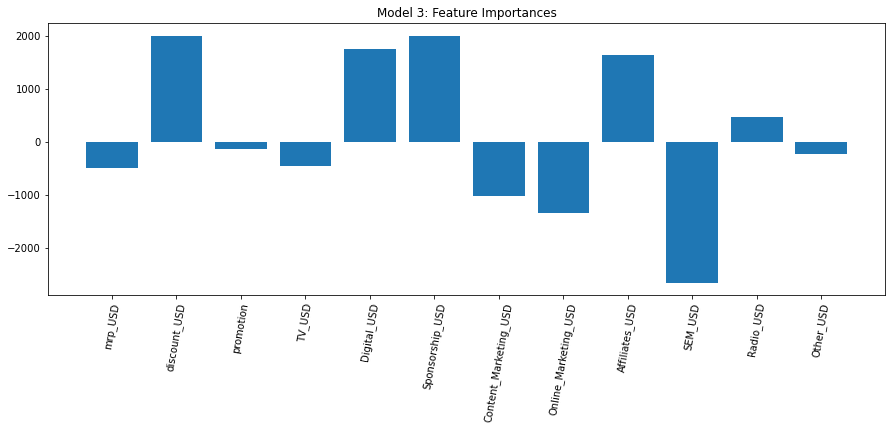

In [16]:
# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(X_test_1.columns.to_list(),feature_importances['importance'])
plt.xticks(rotation=80)
plt.title('Model 3: Feature Importances')
plt.show()

#### Option 2

In [17]:
#Instantiate the Ridge regression with cross-validation to test different values of alpha

#RidgeCV with 5-fold cross-validation (50 rows per fold)
ridge_cv = RidgeCV(cv=5)

# Fit the linear regression
ridge_cv_model = ridge_cv.fit(X_train_2_scaled, y_train_2)

# View alpha
best_alpha = ridge_cv_model.alpha_
print(best_alpha)

10.0


In [18]:
#Instantiate model with alpha = best_alpha
model_4 = Ridge(alpha=best_alpha).fit(X_train_2_scaled, y_train_2)

#Generate predictions
y_train_pred_4 = model_4.predict(X_train_2_scaled)
y_test_pred_4 = model_4.predict(X_test_2_scaled)

In [19]:
#Model parameters
print('Weight coefficients: ',model_4.coef_)

Weight coefficients:  [1351.01871594 1175.48419541 -396.38970461   80.81780281   31.56821219
  157.50985418  -96.98666082  131.34423667  170.70338531   33.13470227
 -183.74538558   50.28065581]


#### Evaluate Ridge Regression Model 4 (Option 2)

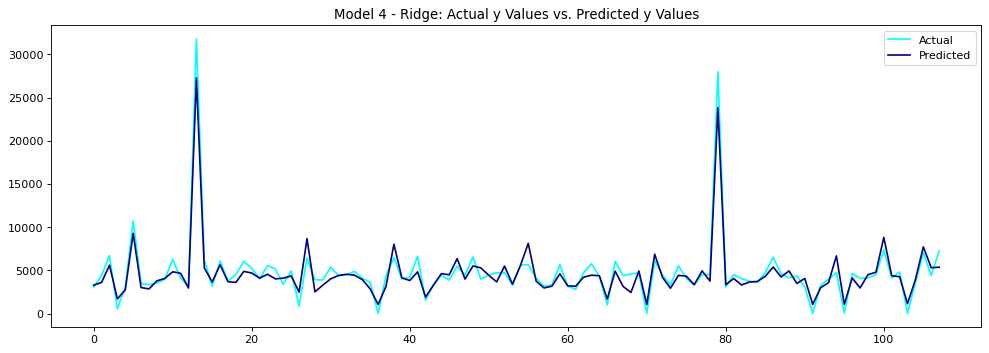

In [20]:
#Plot accuracy

# Creating Line Graph
plt.figure(num=None, figsize=(15, 5), dpi=80)
y1 = y_test_2.to_numpy()
y2 = y_test_pred_4
plt.plot(y1, label = 'Actual', color = 'aqua') 
plt.plot(y2, label = 'Predicted', color = 'navy')
plt.title('Model 4 - Ridge: Actual y Values vs. Predicted y Values')
plt.legend()
plt.show()

In [21]:
# Get r-squared value for training and test sets
model_4_r2 = r2_score(y_train_2, y_train_pred_4), r2_score(y_test_2, y_test_pred_4)
model_4_r2

(0.844544760772335, 0.9231161076706003)

In [22]:
# Get mean absolute error for training and test sets
model_4_mae = mean_absolute_error(y_train_2, y_train_pred_4), mean_absolute_error(y_test_2, y_test_pred_4)
model_4_mae

(741.0963586505228, 781.9295207184193)

In [23]:
#Get mean squared error for training and test sets
model_4_mse = mean_squared_error(y_train_2, y_train_pred_4), mean_squared_error(y_test_2, y_test_pred_4)
model_4_mse

(1051925.1781721627, 1133913.6858917037)

In [24]:
#Get root mean squared error for training and test sets
np.sqrt(model_4_mse)

array([1025.63403716, 1064.85383311])

In [25]:
#Create coeficients variable
coefficients = model_4.coef_

#Create feature importances df
feature_importances = pd.DataFrame(coefficients, X_test_2.columns, columns = ['coefficient'])

#Get standard deviations for each feature
stdevs = []
for i in range(len(X_test_2.columns)):
    stdev = X_test_2_scaled[i].std()
    stdevs.append(stdev)
    
#Get avg. y-value
avg_y = y_test_2.mean()

#Create std column for each feature
feature_importances['std'] = np.array(stdevs).reshape(-1,1)
feature_importances['importance'] = feature_importances['std']* feature_importances['coefficient']
feature_importances['perc_change_y'] = ((feature_importances['importance'])/avg_y)*100
feature_importances.reindex(feature_importances['importance'].abs().sort_values(ascending=False).index)

,coefficient,std,importance,perc_change_y
discount_USD,1175.484195,0.558910,656.989724,13.870396
promotion,-396.389705,1.260741,-499.744931,-10.550637
mrp_USD,1351.018716,0.255254,344.852326,7.280538
Radio_USD,-183.745386,1.057397,-194.291744,-4.101896
Sponsorship_USD,157.509854,1.227833,193.395752,4.082980
Content_Marketing_USD,-96.986661,0.832891,-80.779272,-1.705416
Online_Marketing_USD,131.344237,0.331839,43.585106,0.920171
SEM_USD,33.134702,1.217914,40.355211,0.851981
Affiliates_USD,170.703385,0.215241,36.742443,0.775708
TV_USD,80.817803,0.300435,24.280511,0.512611


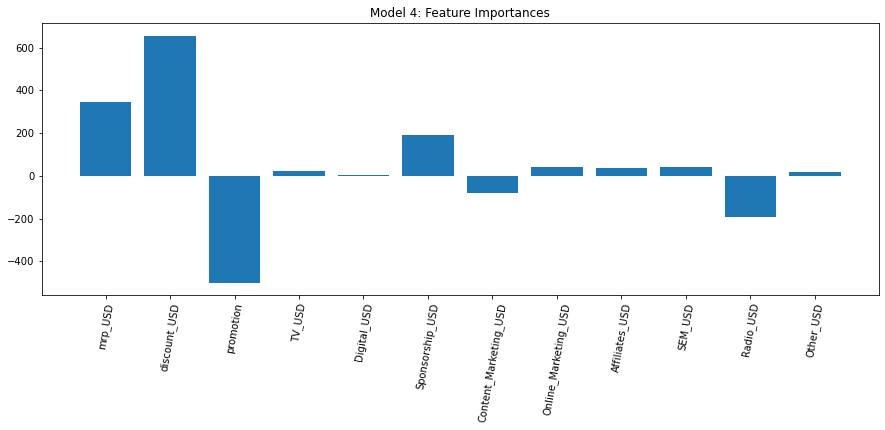

In [26]:
# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(X_test_2.columns.to_list(),feature_importances['importance'])
plt.xticks(rotation=80)
plt.title('Model 4: Feature Importances')
plt.show()

## D: Lasso Regression Models <a class="anchor" id="d"></a>

#### Option 1

In [27]:
#Instantiate the Lasso regression with cross-validation to test different values of alpha

#Generate 50 (default) random values using 5-fold cross-validation
lasso_cv = LassoCV(cv=5, random_state=2, tol=.0005)

# Fit the linear regression
lasso_cv_model = lasso_cv.fit(X_train_1_scaled, y_train_1)

# View alpha
best_alpha_lasso = lasso_cv_model.alpha_
print(best_alpha_lasso)

134.55184015612375


In [28]:
#Instantiate model with alpha = best_alpha
model_5 = Lasso(alpha=best_alpha_lasso).fit(X_train_1_scaled, y_train_1)

#Generate predictions
y_train_pred_5 = model_5.predict(X_train_1_scaled)
y_test_pred_5 = model_5.predict(X_test_1_scaled)

In [29]:
#Model parameters
print('Weight coefficients: ',model_5.coef_)

Weight coefficients:  [2131.18879109    0.           -0.            0.           -0.
  219.32043568   -0.            0.           75.12446465   -0.
   -0.           -0.        ]


#### Evaluate Lasso Regression Model 5

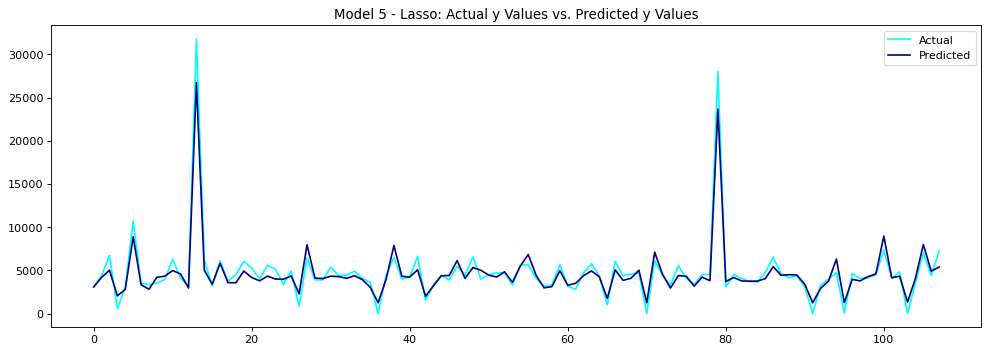

In [30]:
#Plot accuracy

# Creating Line Graph
plt.figure(num=None, figsize=(15, 5), dpi=80)
y1 = y_test_1.to_numpy()
y2 = y_test_pred_5
plt.plot(y1, label = 'Actual', color = 'aqua') 
plt.plot(y2, label = 'Predicted', color = 'navy')
plt.title('Model 5 - Lasso: Actual y Values vs. Predicted y Values')
plt.legend()
plt.show()

In [52]:
# Get r-squared value for training and test sets
model_5_r2 = r2_score(y_train_1, y_train_pred_5), r2_score(y_test_1, y_test_pred_5)
model_5_r2

(0.8314924775065475, 0.9317084734758077)

In [31]:
# Get mean absolute error for training and test sets
model_5_mae = mean_absolute_error(y_train_1, y_train_pred_5), mean_absolute_error(y_test_1, y_test_pred_5)
model_5_mae

(752.0692562022067, 684.1494690851864)

In [32]:
#Get mean squared error for training and test sets
model_5_mse = mean_squared_error(y_train_1, y_train_pred_5), mean_squared_error(y_test_1, y_test_pred_5)
model_5_mse

(1140246.5848235611, 1007190.1175925098)

In [33]:
#Get root mean squared error for training and test sets
np.sqrt(model_5_mse)

array([1067.82329288, 1003.5886197 ])

In [34]:
#Create coeficients variable
coefficients = model_5.coef_

#Create feature importances df
feature_importances = pd.DataFrame(coefficients, X_test_1.columns, columns = ['coefficient'])

#Get standard deviations for each feature
stdevs = []
for i in range(len(X_test_1.columns)):
    stdev = X_test_1_scaled[i].std()
    stdevs.append(stdev)
    
#Get avg. y-value
avg_y = y_test_1.mean()

#Create std column for each feature
feature_importances['std'] = np.array(stdevs).reshape(-1,1)
feature_importances['importance'] = feature_importances['std']* feature_importances['coefficient']
feature_importances['perc_change_y'] = ((feature_importances['importance'])/avg_y)*100
feature_importances.reindex(feature_importances['importance'].abs().sort_values(ascending=False).index)

,coefficient,std,importance,perc_change_y
mrp_USD,2131.188791,0.619172,1319.572761,27.858879
Sponsorship_USD,219.320436,1.229068,269.559824,5.690959
Affiliates_USD,75.124465,0.502908,37.780726,0.797628
Other_USD,-0.000000,0.385840,-0.000000,-0.000000
Radio_USD,-0.000000,0.458549,-0.000000,-0.000000
SEM_USD,-0.000000,1.282448,-0.000000,-0.000000
Online_Marketing_USD,0.000000,0.605411,0.000000,0.000000
Content_Marketing_USD,-0.000000,0.576706,-0.000000,-0.000000
Digital_USD,-0.000000,0.604561,-0.000000,-0.000000
TV_USD,0.000000,0.481019,0.000000,0.000000


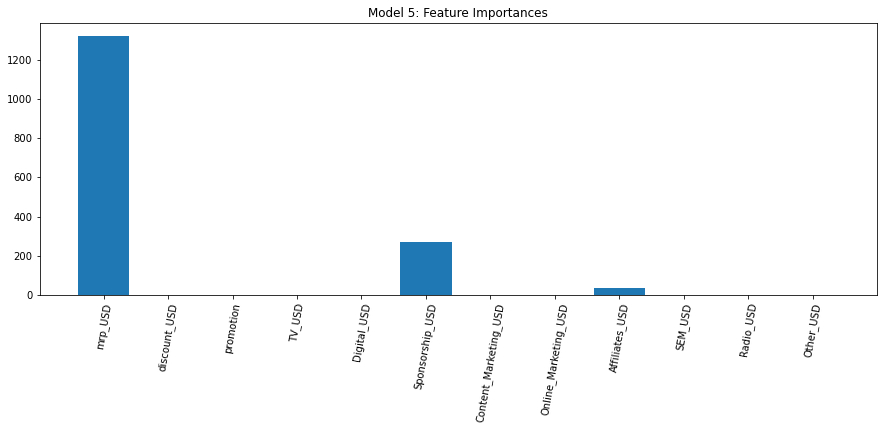

In [35]:
# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(X_test_1.columns.to_list(),feature_importances['importance'])
plt.xticks(rotation=80)
plt.title('Model 5: Feature Importances')
plt.show()

#### Option 2

In [36]:
#Instantiate the Lasso regression with cross-validation to test different values of alpha

#Generate 50 (default) random values using 5-fold cross-validation
lasso_cv = LassoCV(cv=5, random_state=2, tol=.0005)

# Fit the linear regression
lasso_cv_model = lasso_cv.fit(X_train_2_scaled, y_train_2)

# View alpha
best_alpha_lasso = lasso_cv_model.alpha_
print(best_alpha_lasso)

134.55184015612375


In [37]:
#Instantiate model with alpha = best_alpha
model_6 = Lasso(alpha=best_alpha_lasso).fit(X_train_2_scaled, y_train_2)

#Generate predictions
y_train_pred_6 = model_6.predict(X_train_2_scaled)
y_test_pred_6 = model_6.predict(X_test_2_scaled)

In [38]:
#Model parameters
print('Weight coefficients: ',model_6.coef_)

Weight coefficients:  [2187.47809587    0.           -0.            0.            0.
   74.82215751    0.            0.           72.13089283    0.
   -2.68107947    0.        ]


#### Evaluate Lasso Regression Model 6

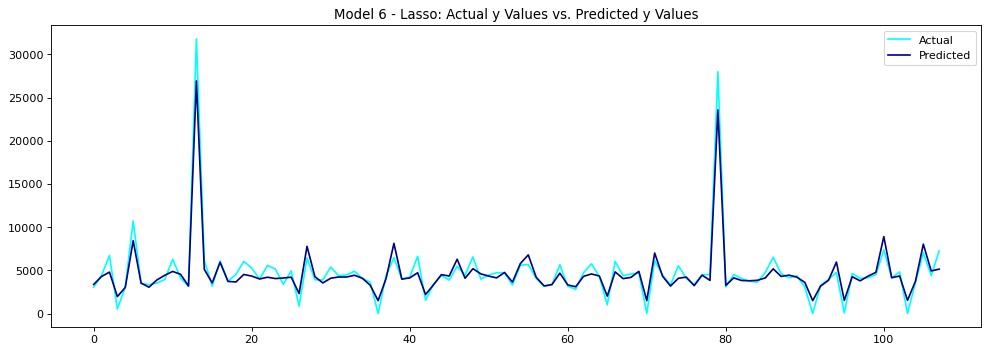

In [39]:
#Plot accuracy

# Creating Line Graph
plt.figure(num=None, figsize=(15, 5), dpi=80)
y1 = y_test_2.to_numpy()
y2 = y_test_pred_6
plt.plot(y1, label = 'Actual', color = 'aqua') 
plt.plot(y2, label = 'Predicted', color = 'navy')
plt.title('Model 6 - Lasso: Actual y Values vs. Predicted y Values')
plt.legend()
plt.show()

In [40]:
# Get r-squared value for training and test sets
model_6_r2 = r2_score(y_train_2, y_train_pred_6), r2_score(y_test_2, y_test_pred_6)
model_6_r2

(0.8206793224544044, 0.9264102752721912)

In [41]:
# Get mean absolute error for training and test sets
model_6_mae = mean_absolute_error(y_train_2, y_train_pred_6), mean_absolute_error(y_test_2, y_test_pred_6)
model_6_mae

(757.2445128856618, 686.0253563469788)

In [42]:
#Get mean squared error for training and test sets
model_6_mse = mean_squared_error(y_train_2, y_train_pred_6), mean_squared_error(y_test_2, y_test_pred_6)
model_6_mse

(1213416.3931319877, 1085330.0149315805)

In [43]:
#Get root mean squared error for training and test sets
np.sqrt(model_6_mse)

array([1101.55181137, 1041.79173299])

In [44]:
#Create coeficients variable
coefficients = model_6.coef_

#Create feature importances df
feature_importances = pd.DataFrame(coefficients, X_test_2.columns, columns = ['coefficient'])

#Get standard deviations for each feature
stdevs = []
for i in range(len(X_test_2.columns)):
    stdev = X_test_2_scaled[i].std()
    stdevs.append(stdev)
    
#Get avg. y-value
avg_y = y_test_2.mean()

#Create std column for each feature
feature_importances['std'] = np.array(stdevs).reshape(-1,1)
feature_importances['importance'] = feature_importances['std']* feature_importances['coefficient']
feature_importances['perc_change_y'] = ((feature_importances['importance'])/avg_y)*100
feature_importances.reindex(feature_importances['importance'].abs().sort_values(ascending=False).index)

,coefficient,std,importance,perc_change_y
mrp_USD,2187.478096,0.255254,558.361554,11.788154
Sponsorship_USD,74.822158,1.227833,91.869093,1.939544
Affiliates_USD,72.130893,0.215241,15.525557,0.327776
Radio_USD,-2.681079,1.057397,-2.834964,-0.059852
Other_USD,0.000000,0.381703,0.000000,0.000000
SEM_USD,0.000000,1.217914,0.000000,0.000000
Online_Marketing_USD,0.000000,0.331839,0.000000,0.000000
Content_Marketing_USD,0.000000,0.832891,0.000000,0.000000
Digital_USD,0.000000,0.200194,0.000000,0.000000
TV_USD,0.000000,0.300435,0.000000,0.000000


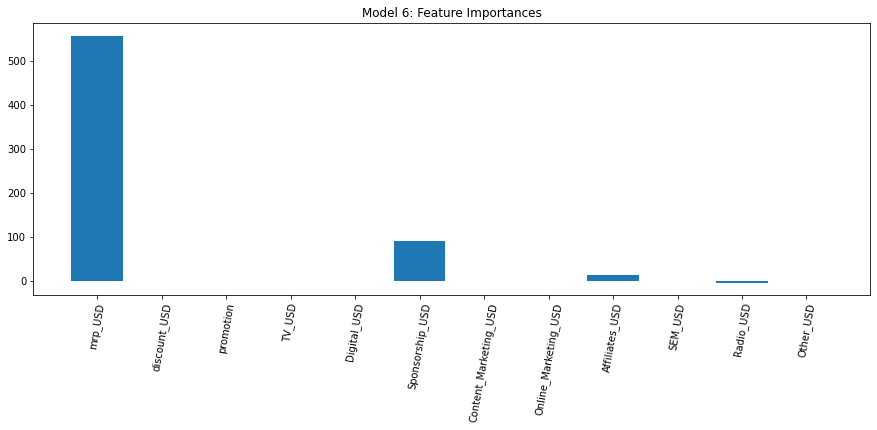

In [45]:
# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(X_test_2.columns.to_list(),feature_importances['importance'])
plt.xticks(rotation=80)
plt.title('Model 6: Feature Importances')
plt.show()

## E: Random Forest Models <a class="anchor" id="e"></a>

#### Model 7: Option 1 with all default hyperparameters

In [46]:
#Instantiate model with all default hyper-parameters
rf_regressor = RandomForestRegressor(random_state=2)

#Create model
model_7 = rf_regressor.fit(X_train_1_scaled, y_train_1)

#Generate predictions
y_train_pred_7 = model_7.predict(X_train_1_scaled)
y_test_pred_7 = model_7.predict(X_test_1_scaled)

In [47]:
#View hyperparameters
model_7.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

#### Evaluate Random Forest Regression Model 7

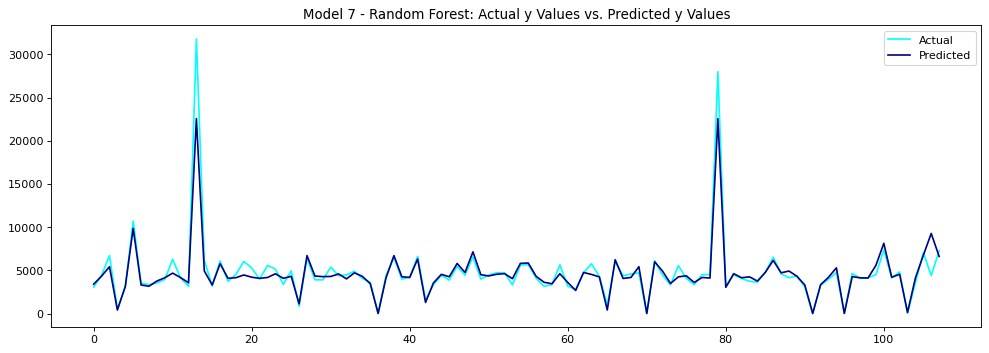

In [48]:
#Plot accuracy

# Creating Line Graph
plt.figure(num=None, figsize=(15, 5), dpi=80)
y1 = y_test_1.to_numpy()
y2 = y_test_pred_7
plt.plot(y1, label = 'Actual', color = 'aqua') 
plt.plot(y2, label = 'Predicted', color = 'navy')
plt.title('Model 7 - Random Forest: Actual y Values vs. Predicted y Values')
plt.legend()
plt.show()

In [49]:
# Get r-squared value for training and test sets
model_7_r2 = r2_score(y_train_1, y_train_pred_7), r2_score(y_test_1, y_test_pred_7)
model_7_r2

(0.9723570113228928, 0.8950802674053345)

In [50]:
# Get mean absolute error for training and test sets
model_7_mae = mean_absolute_error(y_train_1, y_train_pred_7), mean_absolute_error(y_test_1, y_test_pred_7)
model_7_mae

(158.7565466666666, 549.1776543209879)

In [51]:
#Get mean squared error for training and test sets
model_7_mse = mean_squared_error(y_train_1, y_train_pred_7), mean_squared_error(y_test_1, y_test_pred_7)
model_7_mse

(187052.91589942272, 1547397.2129230495)

In [52]:
#Get root mean squared error for training and test sets
np.sqrt(model_7_mse)

array([ 432.49614553, 1243.94421616])

Random Forest feature importances are impurity-based.<br>
According to scikit learn documentation: 'The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.'

In [53]:
#Create feature importances df
feature_importances = pd.DataFrame(model_7.feature_importances_, X_test_1.columns, columns = ['importance'])

#Print df in order of importance
feature_importances.reindex(feature_importances['importance'].abs().sort_values(ascending=False).index)

,importance
mrp_USD,0.551820
discount_USD,0.212223
promotion,0.151079
Content_Marketing_USD,0.045591
Affiliates_USD,0.009787
Online_Marketing_USD,0.007856
SEM_USD,0.007740
Digital_USD,0.005733
TV_USD,0.005046
Sponsorship_USD,0.002170


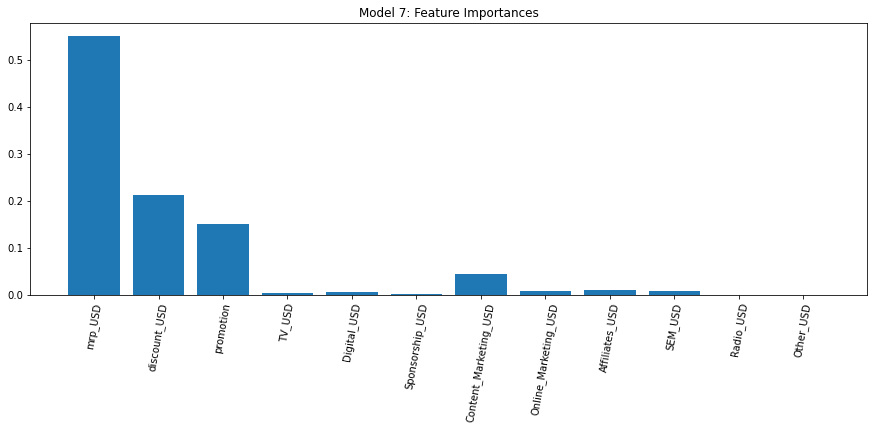

In [54]:
# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(X_test_1.columns.to_list(),feature_importances['importance'])
plt.xticks(rotation=80)
plt.title('Model 7: Feature Importances')
plt.show()

#### Model 8: Option 1 with hyperparameter tuning
Random forest hyperparameter tuning code adapted from Toward Data Science Article by Will Koehrsen [Source]('https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74')

In [55]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 266, 483, 700, 916, 1133, 1350, 1566, 1783, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [57]:
#Instantiate model
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=2, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_1_scaled, y_train_1)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 266, 483, 700, 916,
                                                         1133, 1350, 1566, 1783,
                                                         2000]},
                   random_state=2, verbose=2)

In [58]:
rf_random.best_params_

{'n_estimators': 1783,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [59]:
#Instantiate model with best hyper-parameters
rf = RandomForestRegressor(n_estimators = 1783, 
                                     min_samples_split = 5,
                                     min_samples_leaf = 1,
                                     max_features = 'auto',
                                     max_depth = 40,
                                     bootstrap = False,
                                     random_state=2)

#Create model
model_8 = rf.fit(X_train_1_scaled, y_train_1)

#Generate predictions
y_train_pred_8 = model_8.predict(X_train_1_scaled)
y_test_pred_8 = model_8.predict(X_test_1_scaled)

#### Evaluate Random Forest Regression Model 7

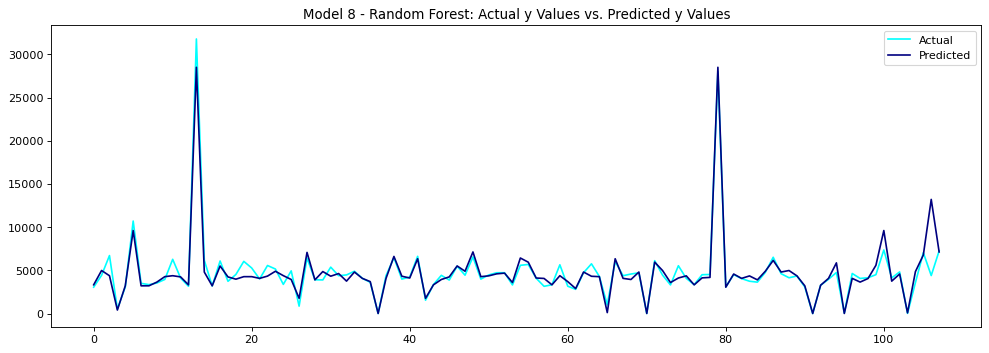

In [60]:
#Plot accuracy

# Creating Line Graph
plt.figure(num=None, figsize=(15, 5), dpi=80)
y1 = y_test_1.to_numpy()
y2 = y_test_pred_8
plt.plot(y1, label = 'Actual', color = 'aqua') 
plt.plot(y2, label = 'Predicted', color = 'navy')
plt.title('Model 8 - Random Forest: Actual y Values vs. Predicted y Values')
plt.legend()
plt.show()

In [61]:
# Get r-squared value for training and test sets
model_8_r2 = r2_score(y_train_1, y_train_pred_8), r2_score(y_test_1, y_test_pred_8)
model_8_r2

(0.9911923266285138, 0.9142771305488884)

In [62]:
# Get mean absolute error for training and test sets
model_8_mae = mean_absolute_error(y_train_1, y_train_pred_8), mean_absolute_error(y_test_1, y_test_pred_8)
model_8_mae

(131.51008849006809, 558.0814189625816)

In [63]:
#Get mean squared error for training and test sets
model_8_mse = mean_squared_error(y_train_1, y_train_pred_8), mean_squared_error(y_test_1, y_test_pred_8)
model_8_mse

(59599.2352950819, 1264274.374248271)

In [64]:
#Get root mean squared error for training and test sets
np.sqrt(model_8_mse)

array([ 244.12954613, 1124.39956165])

In [65]:
#Create feature importances df
feature_importances = pd.DataFrame(model_8.feature_importances_, X_test_1.columns, columns = ['importance'])

#Print df in order of importance
feature_importances.reindex(feature_importances['importance'].abs().sort_values(ascending=False).index)

,importance
mrp_USD,0.701224
discount_USD,0.150515
Content_Marketing_USD,0.075510
promotion,0.056755
Affiliates_USD,0.004899
Online_Marketing_USD,0.004334
TV_USD,0.002454
Sponsorship_USD,0.002092
Digital_USD,0.002063
SEM_USD,0.000132


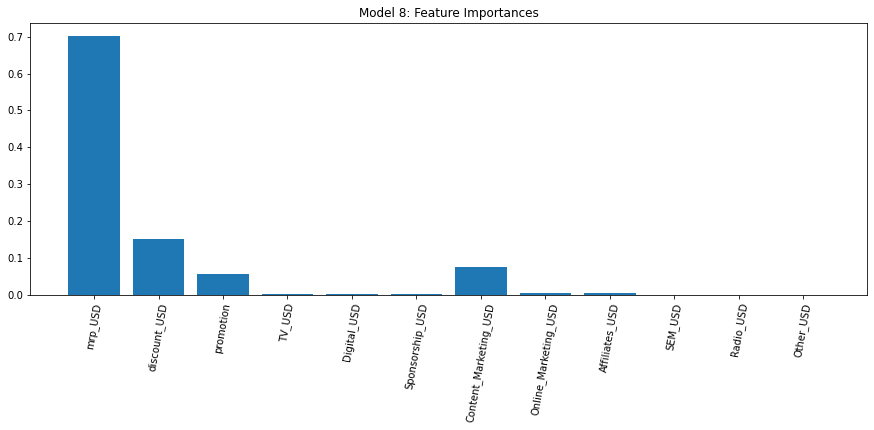

In [66]:
# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(X_test_1.columns.to_list(),feature_importances['importance'])
plt.xticks(rotation=80)
plt.title('Model 8: Feature Importances')
plt.show()

#### Model 9: Option 2 with all default hyperparameters

In [67]:
#Instantiate model with all default hyper-parameters
rf_regressor = RandomForestRegressor(random_state=2)

#Create model
model_9 = rf_regressor.fit(X_train_2_scaled, y_train_2)

#Generate predictions
y_train_pred_9 = model_9.predict(X_train_2_scaled)
y_test_pred_9 = model_9.predict(X_test_2_scaled)

In [68]:
#View hyperparameters
model_9.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

#### Evaluate Random Forest Regression Model 9

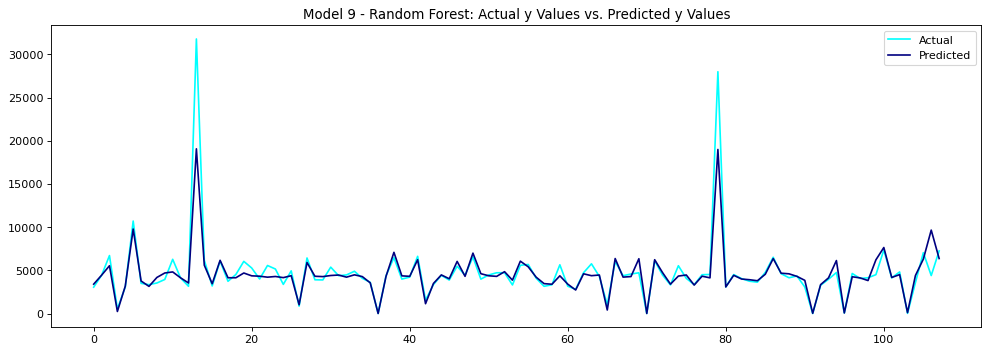

In [69]:
#Plot accuracy

# Creating Line Graph
plt.figure(num=None, figsize=(15, 5), dpi=80)
y1 = y_test_2.to_numpy()
y2 = y_test_pred_9
plt.plot(y1, label = 'Actual', color = 'aqua') 
plt.plot(y2, label = 'Predicted', color = 'navy')
plt.title('Model 9 - Random Forest: Actual y Values vs. Predicted y Values')
plt.legend()
plt.show()

In [70]:
# Get r-squared value for training and test sets
model_9_r2 = r2_score(y_train_2, y_train_pred_9), r2_score(y_test_2, y_test_pred_9)
model_9_r2

(0.9643596465037851, 0.8085391253488834)

In [71]:
# Get mean absolute error for training and test sets
model_9_mae = mean_absolute_error(y_train_2, y_train_pred_9), mean_absolute_error(y_test_2, y_test_pred_9)
model_9_mae

(202.97936000000016, 646.0023456790124)

In [72]:
#Get mean squared error for training and test sets
model_9_mse = mean_squared_error(y_train_2, y_train_pred_9), mean_squared_error(y_test_2, y_test_pred_9)
model_9_mse

(241169.00393893372, 2823739.791288894)

In [73]:
#Get root mean squared error for training and test sets
np.sqrt(model_9_mse)

array([ 491.08960887, 1680.3987001 ])

In [74]:
#Create feature importances df
feature_importances = pd.DataFrame(model_9.feature_importances_, X_test_2.columns, columns = ['importance'])

#Print df in order of importance
feature_importances.reindex(feature_importances['importance'].abs().sort_values(ascending=False).index)

,importance
mrp_USD,0.535740
discount_USD,0.199462
promotion,0.125967
Content_Marketing_USD,0.050290
Affiliates_USD,0.030433
SEM_USD,0.022020
Digital_USD,0.010322
Sponsorship_USD,0.009637
Online_Marketing_USD,0.008394
TV_USD,0.006443


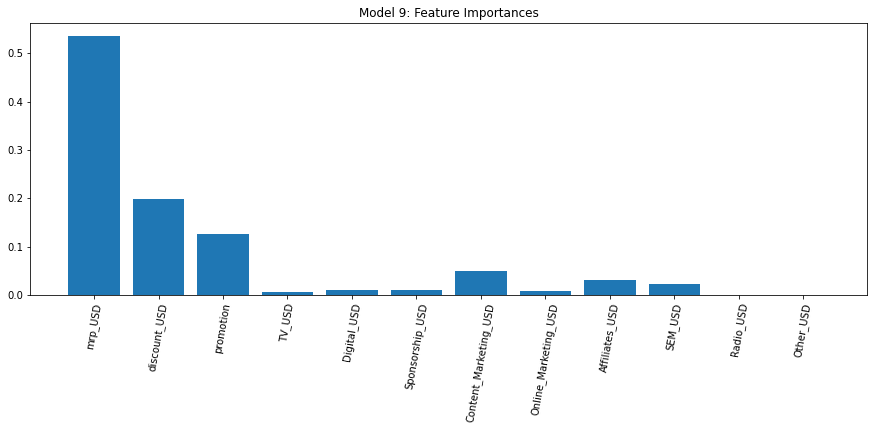

In [75]:
# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(X_test_2.columns.to_list(),feature_importances['importance'])
plt.xticks(rotation=80)
plt.title('Model 9: Feature Importances')
plt.show()

#### Model 10: Option 2 with hyperparameter tuning
Random forest hyperparameter tuning code adapted from Toward Data Science Article by Will Koehrsen [Source]('https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74')

In [150]:
#Instantiate model
rf = RandomForestRegressor()

#Use same random grid as model 8
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=2, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_2_scaled, y_train_2)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 266, 483, 700, 916,
                                                         1133, 1350, 1566, 1783,
                                                         2000]},
                   random_state=2, verbose=2)

In [151]:
rf_random.best_params_

{'n_estimators': 266,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': True}

In [76]:
#Instantiate model with best hyper-parameters
rf = RandomForestRegressor(n_estimators = 266, 
                                     min_samples_split = 2,
                                     min_samples_leaf = 1,
                                     max_features = 'auto',
                                     max_depth = 110,
                                     bootstrap = True,
                                     random_state=2)

#Create model
model_10 = rf.fit(X_train_2_scaled, y_train_2)

#Generate predictions
y_train_pred_10 = model_10.predict(X_train_2_scaled)
y_test_pred_10 = model_10.predict(X_test_2_scaled)

#### Evaluate Random Forest Regression Model 7

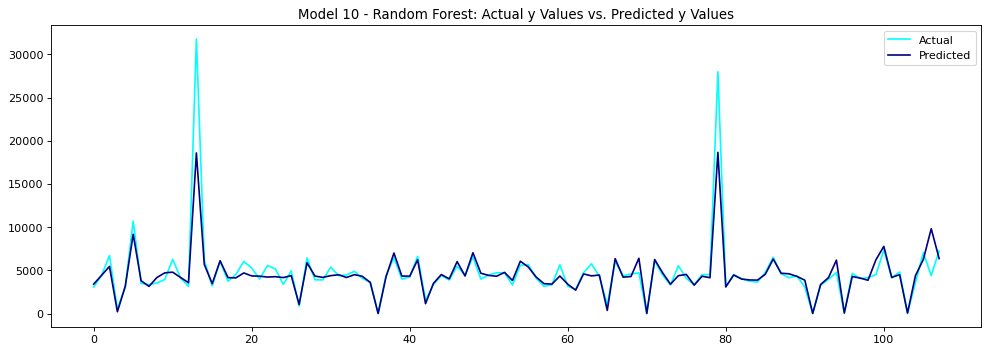

In [77]:
#Plot accuracy

# Creating Line Graph
plt.figure(num=None, figsize=(15, 5), dpi=80)
y1 = y_test_2.to_numpy()
y2 = y_test_pred_10
plt.plot(y1, label = 'Actual', color = 'aqua') 
plt.plot(y2, label = 'Predicted', color = 'navy')
plt.title('Model 10 - Random Forest: Actual y Values vs. Predicted y Values')
plt.legend()
plt.show()

In [78]:
# Get r-squared value for training and test sets
model_10_r2 = r2_score(y_train_2, y_train_pred_10), r2_score(y_test_2, y_test_pred_10)
model_10_r2

(0.9603001387661294, 0.7944238239306628)

In [79]:
# Get mean absolute error for training and test sets
model_10_mae = mean_absolute_error(y_train_2, y_train_pred_10), mean_absolute_error(y_test_2, y_test_pred_10)
model_10_mae

(199.44278195488712, 665.4229671400725)

In [80]:
#Get mean squared error for training and test sets
model_10_mse = mean_squared_error(y_train_2, y_train_pred_10), mean_squared_error(y_test_2, y_test_pred_10)
model_10_mse

(268638.6371365065, 3031917.7720554387)

In [81]:
#Get root mean squared error for training and test sets
np.sqrt(model_10_mse)

array([ 518.30361482, 1741.24029705])

In [82]:
#Create feature importances df
feature_importances = pd.DataFrame(model_10.feature_importances_, X_test_2.columns, columns = ['importance'])

#Print df in order of importance
feature_importances.reindex(feature_importances['importance'].abs().sort_values(ascending=False).index)

,importance
mrp_USD,0.522657
discount_USD,0.232161
promotion,0.103732
Content_Marketing_USD,0.060043
Affiliates_USD,0.034140
SEM_USD,0.015679
Digital_USD,0.010962
Sponsorship_USD,0.008306
Online_Marketing_USD,0.006289
TV_USD,0.004639


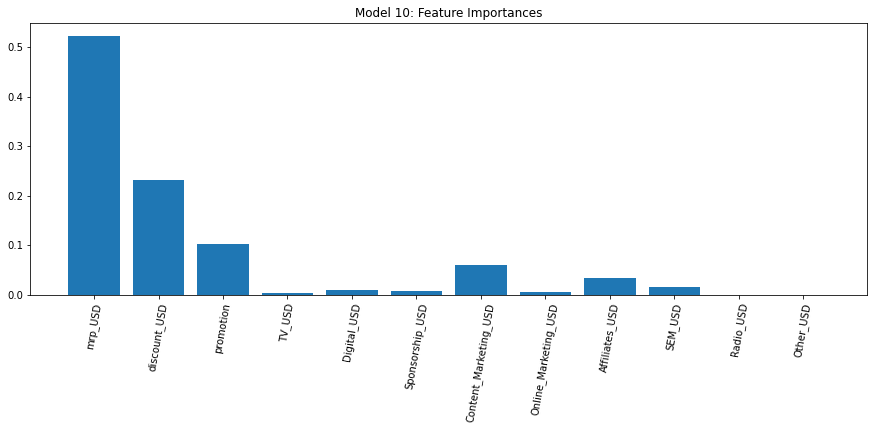

In [83]:
# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(X_test_2.columns.to_list(),feature_importances['importance'])
plt.xticks(rotation=80)
plt.title('Model 10: Feature Importances')
plt.show()

## F: Model Summary <a class="anchor" id="f"></a>

* Model 3 conducting a ridge regression with an alpha  of 0.1 using the option 1 dataset had the highest r-squared score of 0.96.
* Model 7 conducting a random forest regression using scikit-learn’s default hyperparameters using the option 1 dataset had the lowest mean absolute error of 549.1776, although model 3 came in third with a mean absolute error of 575.8927.
* Model 3 also had the lowest root mean squared error of 757.1106.
* Based on these results, model 3 is the optimal model for predicting the key drivers of sales units.
* According to model 3, the key media drivers of sales units were the digital, sponsorship, affiliates, and SEM spends, although SEM had a negative relationship with sales.